In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# load processed dataset
data = np.load("../data/tree_processed_data.npz")
X_train, X_test = data["X_train"], data["X_test"]
y_train, y_test = data["y_train"], data["y_test"]

In [4]:
X_train

array([[0.        , 0.        , 0.        , ..., 7.38956395, 7.43307535,
        6.29341928],
       [0.        , 0.        , 0.        , ..., 9.03610603, 7.56579328,
        6.80350526],
       [0.        , 0.        , 0.        , ..., 8.85723049, 8.15794351,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 9.31479047, 6.76964198,
        0.        ],
       [0.        , 0.        , 0.        , ..., 8.7524234 , 7.66434663,
        6.53813982],
       [0.        , 0.        , 0.        , ..., 8.24957515, 7.30720231,
        6.44730586]], shape=(3506, 54))

In [5]:
# train the model
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
# predicting the test set
y_pred = regressor.predict(X_test)
print(np.expm1(y_pred).round(2), y_pred.shape, y_pred.dtype)

[ 371438.72  803980.09  617080.82  246070.02  683680.54  413353.57
  258703.88  165785.57  323003.88  352156.61  257154.55  402177.19
  656649.81  306834.61  490829.43  773866.48  421612.86  755622.69
  216813.24  212889.48  840913.6   212456.6   328111.39  545535.26
  442163.9   507518.67  230754.8   623247.28  433739.03  856727.92
 1026987.29  489109.89  391774.94  324179.51  607404.45  553658.89
  395541.29  260137.18  200259.18  270585.63  290034.42  907078.2
  400789.29  864116.73  573715.54  426951.25  560859.01 1290918.06
 1067379.63  322778.15  659025.    487152.7   448853.85  542018.93
  568029.22  401572.57  738763.58  490645.97  390597.84  424653.97
  578086.37  144154.72 1033364.08  543209.64  605417.77  458460.27
  457578.29  695827.92  367282.49  247022.13  502068.22  718977.93
  403940.85  340939.4  1545607.65  515776.    257410.59  508942.63
 2093534.85  400564.46  501685.99  314716.4   449843.04  660385.17
  146225.92  414074.61  262953.09  279158.67  492998.86  200807

In [8]:
# compare predicted values vs Actual values
print(np.concatenate((y_pred.reshape(-1,1).round(2), y_test.reshape(-1,1).round(2)),1))

[[12.83 13.14]
 [13.6  13.85]
 [13.33 13.34]
 ...
 [12.73 12.57]
 [12.42 12.54]
 [13.81 13.72]]


In [9]:
# predicting for one sample
one_sample = X_test[0]
y_hat_1 =regressor.predict([one_sample])[0]
print(np.expm1(y_hat_1).round(2))

371438.72


In [10]:
# measure model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): 0.214
Mean Squared Error (MSE): 0.093
Root Mean Squared Error (RMSE): 0.305
R² Score: 0.676


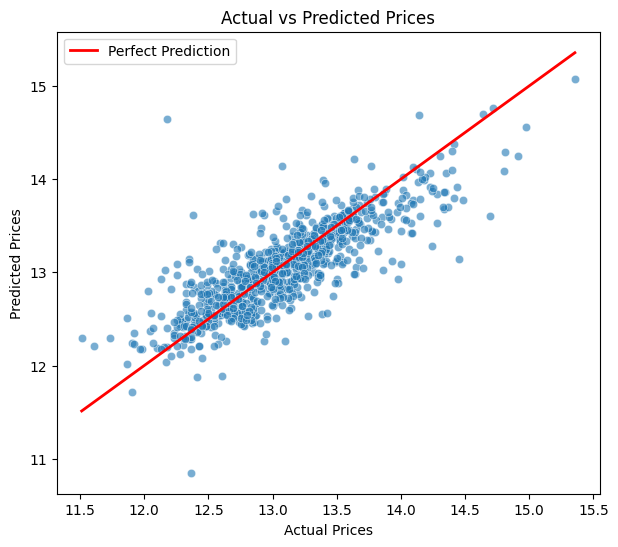

In [11]:
# visualize model performance
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()


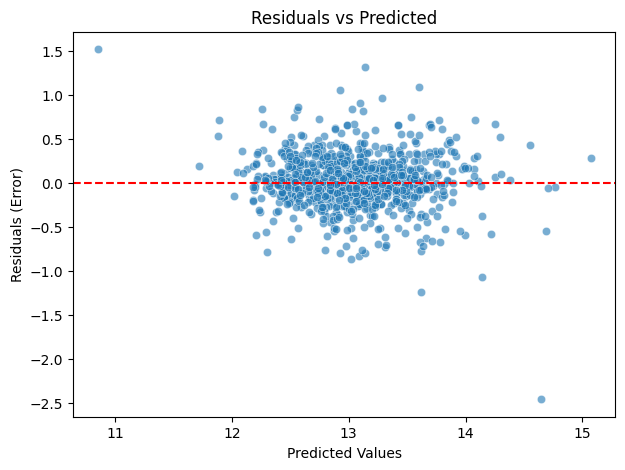

In [12]:
# residual plot
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Error)")
plt.title("Residuals vs Predicted")
plt.show()

In [14]:
# check feature importance (coefficients)
original_features = ['bedrooms','bathrooms','floors', 'waterfront','view', 'condition', 'was_renovated', 'age', 'sqft_lot', 'sqft_living','sqft_basement']
importances = regressor.feature_importances_
coeffs = pd.DataFrame({
    'Feature': original_features,
    'Importance': importances.flatten()[43:],
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)
coeffs

,Feature,Importance
0,sqft_living,0.525191
1,sqft_lot,0.071020
2,age,0.069218
3,condition,0.026417
4,sqft_basement,0.023997
5,bathrooms,0.022589
6,bedrooms,0.015804
7,view,0.014550
8,floors,0.006202
9,was_renovated,0.004108
